# Math



## Numeric derivatives by differences



numpy has a function called numpy.diff() that is similar to the one found in matlab. It calculates the differences between the elements in your list, and returns a list that is one element shorter, which makes it unsuitable for plotting the derivative of a function.

Loops in python are pretty slow (relatively speaking) but they are usually trivial to understand. In this script we show some simple ways to construct derivative vectors using loops. It is implied in these formulas that the data points are equally spaced. If they are not evenly spaced, you need a different approach.



 Forward difference took 0.000152 seconds
 Backward difference took 0.000130 seconds
 Centered difference took 0.000154 seconds


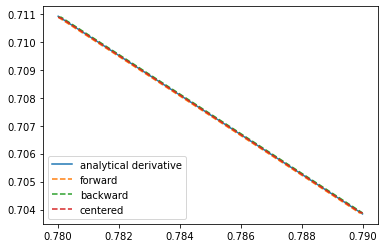

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0.78,0.79,100)
y = np.sin(x)
dy_analytical = np.cos(x)

'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print(' Forward difference took %f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print(' Backward difference took %f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print(' Centered difference took %f seconds' % (time.time() - tc1))

'''
the centered formula is the most accurate formula here
'''

plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')

plt.legend(loc='lower left');

## Vectorized numeric derivatives



Loops are usually not great for performance. Numpy offers some vectorized methods that allow us to compute derivatives without loops, although this comes at the mental cost of harder to understand syntax



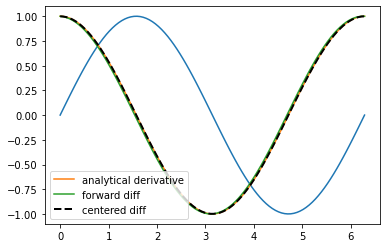

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
dy_analytical = np.cos(x)


# we need to specify the size of dy ahead because diff returns
#an array of n-1 elements
dy = np.zeros(y.shape, float) #we know it will be this size
dy[0:-1] = np.diff(y) / np.diff(x)
dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])


'''
calculate dy by center differencing using array slices
'''

dy2 = np.zeros(y.shape, float) #we know it will be this size
dy2[1:-1] = (y[2:] - y[0:-2]) / (x[2:] - x[0:-2])

# now the end points
dy2[0] = (y[1] - y[0]) / (x[1] - x[0])
dy2[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])

plt.plot(x,y)
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dy,label='forward diff')
plt.plot(x,dy2,'k--',lw=2,label='centered diff')
plt.legend(loc='lower left');

## 2-point vs. 4-point numerical derivatives



If your data is very noisy, you will have a hard time getting good derivatives; derivatives tend to magnify noise. In these cases, you have to employ smoothing techniques, either implicitly by using a multipoint derivative formula, or explicitly by smoothing the data yourself, or taking the derivative of a function that has been fit to the data in the neighborhood you are interested in.

Here is an example of a 4-point centered difference of some noisy data:



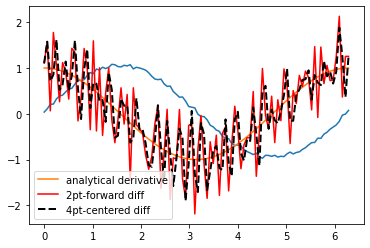

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + 0.1 * np.random.random(size=x.shape)
dy_analytical = np.cos(x)

#2-point formula
dyf = [0.0] * len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

'''
calculate dy by 4-point center differencing using array slices

\frac{y[i-2] - 8y[i-1] + 8[i+1] - y[i+2]}{12h}

y[0] and y[1] must be defined by lower order methods
and y[-1] and y[-2] must be defined by lower order methods
'''

dy = np.zeros(y.shape, float) #we know it will be this size
h = x[1] - x[0] #this assumes the points are evenely spaced!
dy[2:-2] = (y[0:-4] - 8 * y[1:-3] + 8 * y[3:-1] - y[4:]) / (12.0 * h)

# simple differences at the end-points
dy[0] = (y[1] - y[0])/(x[1] - x[0])
dy[1] = (y[2] - y[1])/(x[2] - x[1])
dy[-2] = (y[-2] - y[-3]) / (x[-2] - x[-3])
dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])


plt.plot(x, y)
plt.plot(x, dy_analytical, label='analytical derivative')
plt.plot(x, dyf, 'r-', label='2pt-forward diff')
plt.plot(x, dy, 'k--', lw=2, label='4pt-centered diff')
plt.legend(loc='lower left');

## Derivatives by polynomial fitting



One way to reduce the noise inherent in derivatives of noisy data is to fit a smooth function through the data, and analytically take the derivative of the curve. Polynomials are especially convenient for this. The challenge is to figure out what an appropriate polynomial order is. This requires judgment and experience.



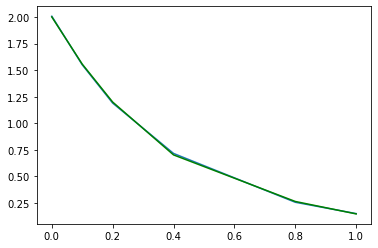

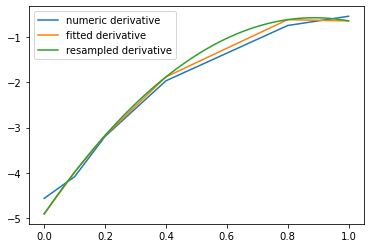

In [4]:
import numpy as np
import matplotlib.pyplot as plt

tspan = [0, 0.1, 0.2, 0.4, 0.8, 1]
Ca_data = [2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495]

p = np.polyfit(tspan, Ca_data, 3)
plt.figure()
plt.plot(tspan, Ca_data)
plt.plot(tspan, np.polyval(p, tspan), 'g-')

# compute derivatives
dp = np.polyder(p)

dCdt_fit = np.polyval(dp, tspan)

dCdt_numeric = np.gradient(Ca_data, tspan) # 2-point deriv

plt.figure()
plt.plot(tspan, dCdt_numeric, label='numeric derivative')
plt.plot(tspan, dCdt_fit, label='fitted derivative')

t = np.linspace(min(tspan), max(tspan))
plt.plot(t, np.polyval(dp, t), label='resampled derivative')
plt.legend(loc='best');

You can see a third order polynomial is a reasonable fit here. There are only 6 data points here, so any higher order risks overfitting. Here is the comparison of the numerical derivative and the fitted derivative. We have "resampled" the fitted derivative to show the actual shape. Note the derivative appears to go through a maximum near t = 0.9. In this case, that is probably unphysical as the data is related to the consumption of species A in a reaction. The derivative should increase monotonically to zero. The increase is an artefact of the fitting process. End points are especially sensitive to this kind of error.



## Derivatives by fitting a function and taking the analytical derivative



A variation of a polynomial fit is to fit a model with reasonable physics. Here we fit a nonlinear function to the noisy data. The model is for the concentration vs. time in a batch reactor for a first order irreversible reaction. Once we fit the data, we take the analytical derivative of the fitted function.



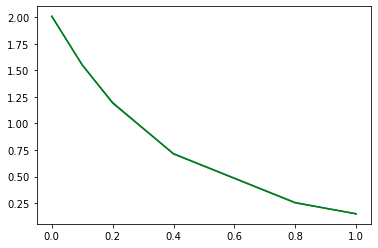

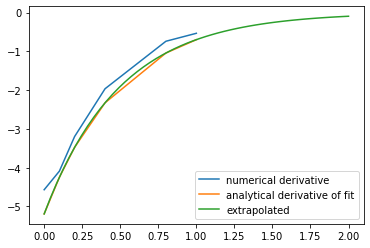

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

tspan = np.array([0, 0.1, 0.2, 0.4, 0.8, 1])
Ca_data = np.array([2.0081,  1.5512,  1.1903,  0.7160,  0.2562,  0.1495])

def func(t, Ca0, k):
    return Ca0 * np.exp(-k * t)


pars, pcov = curve_fit(func, tspan, Ca_data, p0=[2, 2.3])

plt.plot(tspan, Ca_data)
plt.plot(tspan, func(tspan, *pars), 'g-')

# analytical derivative
k, Ca0 = pars
dCdt = -k * Ca0 * np.exp(-k * tspan)
t = np.linspace(0, 2)
dCdt_res =  -k * Ca0 * np.exp(-k * t)

plt.figure()
plt.plot(tspan, np.gradient(Ca_data, tspan), label='numerical derivative')
plt.plot(tspan, dCdt, label='analytical derivative of fit')
plt.plot(t, dCdt_res, label='extrapolated')
plt.legend(loc='best');

Visually this fit is about the same as a third order polynomial. Note the difference in the derivative though. We can readily extrapolate this derivative and get reasonable predictions of the derivative. That is true in this case because we fitted a physically relevant model for concentration vs. time for an irreversible, first order reaction.



## Derivatives by FFT



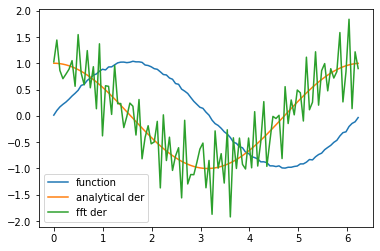

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 101 #number of points
L = 2 * np.pi #interval of data

x = np.arange(0.0, L, L/float(N)) #this does not include the endpoint

#add some random noise
y = np.sin(x) + 0.05 * np.random.random(size=x.shape)
dy_analytical = np.cos(x)

'''
http://sci.tech-archive.net/Archive/sci.math/2008-05/msg00401.html

you can use fft to calculate derivatives!
'''

if N % 2 == 0:
    k = np.asarray(list(range(0, N // 2)) + [0] + list(range(-N // 2 + 1, 0)), np.float64)
else:
    k = np.asarray(list(range(0, (N - 1) // 2)) + [0] + list(range(-(N - 1) // 2, 0)), np.float64)

k *= 2 * np.pi / L

fd = np.real(np.fft.ifft(1.0j * k * np.fft.fft(y)))

plt.plot(x, y, label='function')
plt.plot(x,dy_analytical,label='analytical der')
plt.plot(x,fd,label='fft der')
plt.legend(loc='lower left');

## A novel way to numerically estimate the derivative of a function - complex-step derivative approximation



[Matlab post](http://matlab.cheme.cmu.edu/2011/12/24/a-novel-way-to-numerically-estimate-the-derivative-of-a-function-complex-step-derivative-approximation/)

Adapted from [http://biomedicalcomputationreview.org/2/3/8.pdf>](http://biomedicalcomputationreview.org/2/3/8.pdf>)and
[http://dl.acm.org/citation.cfm?id=838250.838251](http://dl.acm.org/citation.cfm?id=838250.838251)

This posts introduces a novel way to numerically estimate the derivative
of a function that does not involve finite difference schemes. Finite
difference schemes are approximations to derivatives that become more and
more accurate as the step size goes to zero, except that as the step size
approaches the limits of machine accuracy, new errors can appear in the
approximated results. In the references above, a new way to compute the
derivative is presented that does not rely on differences!

The new way is: $f'(x) = \rm{imag}(f(x + i\Delta x)/\Delta x)$ where the
function $f$ is evaluated in imaginary space with a small $\Delta x$ in
the complex plane. The derivative is miraculously equal to the imaginary
part of the result in the limit of $\Delta x \rightarrow 0$!

This example comes from the first link. The derivative must be evaluated
using the chain rule.  We compare a forward difference, central
difference and complex-step derivative approximations.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):   return np.sin(3*x)*np.log(x)

x = 0.7
h = 1e-7

# analytical derivative
dfdx_a = 3 * np.cos( 3*x)*np.log(x) + np.sin(3*x) / x

# finite difference
dfdx_fd = (f(x + h) - f(x))/h

# central difference
dfdx_cd = (f(x+h)-f(x-h))/(2*h)

# complex method
dfdx_I = np.imag(f(x + complex(0, h))/h)

print(dfdx_a)
print(dfdx_fd)
print(dfdx_cd)
print(dfdx_I)

1.7733541062373446
1.773353939249489
1.7733541049502755
1.7733541062373843


These are all the same to 4 decimal places. The simple finite difference is the least accurate, and the central differences is practically the same as the complex number approach.



## Vectorized piecewise functions



[Matlab post](http://matlab.cheme.cmu.edu/2011/11/05/vectorized-piecewise-functions/)
Occasionally we need to define piecewise functions, e.g.

\begin{eqnarray}
f(x) &=&  0, x < 0 \\
     &=&  x, 0 <= x < 1\\
     &=&  2 - x, 1 < x <= 2\\
     &=&  0, x > 2
\end{eqnarray}

Today we examine a few ways to define a function like this. A simple way is to use conditional statements.



In [8]:
def f1(x):
    if x < 0:
        return 0
    elif (x >= 0) & (x < 1):
        return x
    elif (x >= 1) & (x < 2):
        return 2.0 - x
    else:
        return 0

print(f1(-1))
#print(f1([0, 1, 2, 3]))  # does not work!

0


This works, but the function is not vectorized, i.e. f([-1 0 2 3]) does not evaluate properly (it should give a list or array). You can get vectorized behavior by using list comprehension, or by writing your own loop. This does not fix all limitations, for example you cannot use the f1 function in the quad function to integrate it.



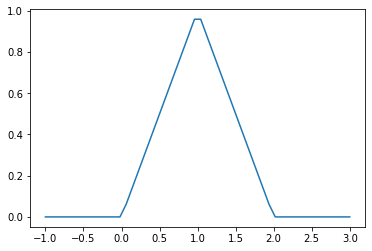

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 3)
y = [f1(xx) for xx in x]

plt.plot(x, y);

Neither of those methods is convenient. It would be nicer if the function was vectorized, which would allow the direct notation f1([0, 1, 2, 3, 4]). A simple way to achieve this is through the use of logical arrays. We create logical arrays from comparison statements.



[0. 0. 1. 0. 0. 0.]


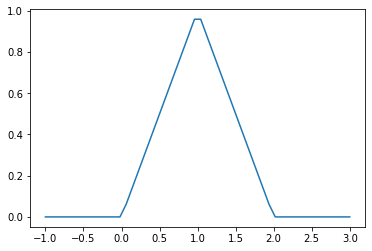

In [10]:
def f2(x):
    'fully vectorized version'
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y += ((x >= 0) & (x < 1)) * x
    y += ((x >= 1) & (x < 2)) * (2 - x)
    return y

print(f2([-1, 0, 1, 2, 3, 4]))
x = np.linspace(-1,3);
plt.plot(x,f2(x));

A third approach is to use Heaviside functions. The Heaviside function is defined to be zero for x less than some value, and 0.5 for x=0, and 1 for x >= 0. If you can live with y=0.5 for x=0, you can define a vectorized function in terms of Heaviside functions like this.



In [11]:
def heaviside(x):
    x = np.array(x)
    if x.shape != ():
        y = np.zeros(x.shape)
        y[x > 0.0] = 1
        y[x == 0.0] = 0.5
    else: # special case for 0d array (a number)
        if x > 0: y = 1
        elif x == 0: y = 0.5
        else: y = 0
    return y

def f3(x):
    x = np.array(x)
    y1 = (heaviside(x) - heaviside(x - 1)) * x # first interval
    y2 = (heaviside(x - 1) - heaviside(x - 2)) * (2 - x) # second interval
    return y1 + y2

from scipy.integrate import quad
print(quad(f3, -1, 3))

(1.0, 1.1102230246251565e-14)


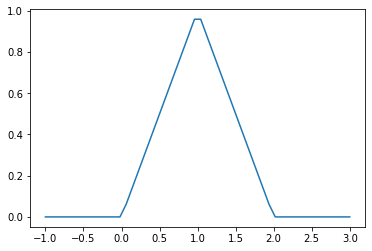

In [12]:
plt.plot(x, f3(x));

There are many ways to define piecewise functions, and vectorization is not always necessary. The advantages of vectorization are usually notational simplicity and speed; loops in python are usually very slow compared to vectorized functions.



## Smooth transitions between discontinuous functions



[original post](http://matlab.cheme.cmu.edu/2011/10/30/smooth-transitions-between-discontinuous-functions/)

In [Post 1280](http://matlab.cheme.cmu.edu/2011/10/27/compute-pipe-diameter/) we used a correlation for the Fanning friction factor for turbulent flow in a pipe. For laminar flow (Re < 3000), there is another correlation that is commonly used: $f_F = 16/Re$. Unfortunately, the correlations for laminar flow and turbulent flow have different values at the transition that should occur at Re = 3000. This discontinuity can cause a lot of problems for numerical solvers that rely on derivatives.

Today we examine a strategy for smoothly joining these two functions. First we define the two functions.



In [13]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def fF_laminar(Re):
    return 16.0 / Re

def fF_turbulent_unvectorized(Re):
    # Nikuradse correlation for turbulent flow
    # 1/np.sqrt(f) = (4.0*np.log10(Re*np.sqrt(f))-0.4)
    # we have to solve this equation to get f
    def func(f):
        return 1/np.sqrt(f) - (4.0*np.log10(Re*np.sqrt(f))-0.4)
    fguess = 0.01
    f, = fsolve(func, fguess)
    return f

# this enables us to pass vectors to the function and get vectors as
# solutions
fF_turbulent = np.vectorize(fF_turbulent_unvectorized)

Now we plot the correlations.



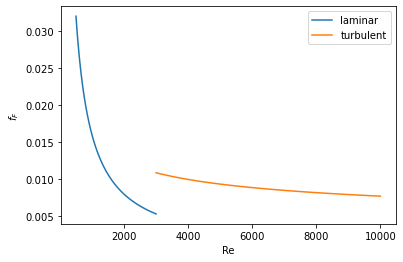

In [14]:
Re1 = np.linspace(500, 3000)
f1 = fF_laminar(Re1)

Re2 = np.linspace(3000, 10000)
f2 = fF_turbulent(Re2)

plt.figure(1); plt.clf()
plt.plot(Re1, f1, label='laminar')
plt.plot(Re2, f2, label='turbulent')
plt.xlabel('Re')
plt.ylabel('$f_F$')
plt.legend();

You can see the discontinuity at Re = 3000. What we need is a method to join these two functions smoothly. We can do that with a sigmoid function.
Sigmoid functions

A sigmoid function smoothly varies from 0 to 1 according to the equation: $\sigma(x) = \frac{1}{1 + e^{-(x-x0)/\alpha}}$. The transition is centered on $x0$, and $\alpha$ determines the width of the transition.



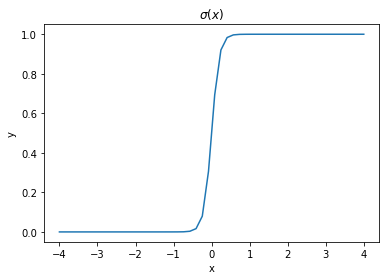

In [15]:
x = np.linspace(-4, 4);
y = 1.0 / (1 + np.exp(-x / 0.1))
plt.figure(2)
plt.clf()
plt.plot(x, y)
plt.xlabel('x'); plt.ylabel('y'); plt.title('$\sigma(x)$');

If we have two functions, $f_1(x)$ and $f_2(x)$ we want to smoothly join, we do it like this: $f(x) = (1-\sigma(x))f_1(x) + \sigma(x)f_2(x)$. There is no formal justification for this form of joining, it is simply a mathematical convenience to get a numerically smooth function. Other functions besides the sigmoid function could also be used, as long as they smoothly transition from 0 to 1, or from 1 to zero.



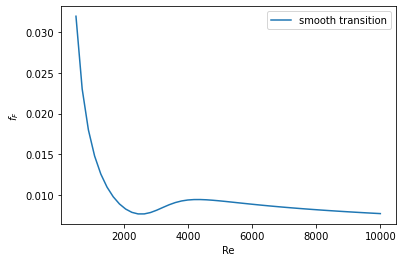

In [16]:
def fanning_friction_factor(Re):
    '''combined, continuous correlation for the fanning friction factor.
    the alpha parameter is chosen to provide the desired smoothness.
    The transition region is about +- 4*alpha. The value 450 was
    selected to reasonably match the shape of the correlation
    function provided by Morrison (see last section of this file)'''
    sigma =  1. / (1 + np.exp(-(Re - 3000.0) / 450.0));
    f = (1-sigma) * fF_laminar(Re) + sigma * fF_turbulent(Re)
    return f

Re = np.linspace(500, 10000);
f = fanning_friction_factor(Re);

plt.plot(Re,f, label='smooth transition')
plt.xlabel('Re')
plt.ylabel('$f_F$')
plt.legend();

You can see that away from the transition the combined function is practically equivalent to the original two functions. That is because away from the transition the sigmoid function is 0 or 1. Near Re = 3000 is a smooth transition from one curve to the other curve.

[Morrison](http://www.chem.mtu.edu/~fmorriso/DataCorrelationForSmoothPipes2010.pdf) derived a single function for the friction factor correlation over all Re: $f = \frac{0.0076\left(\frac{3170}{Re}\right)^{0.165}}{1 + \left(\frac{3171}{Re}\right)^{7.0}} + \frac{16}{Re}$. Here we show the comparison with the approach used above. The friction factor differs slightly at high Re, because Morrison's is based on the Prandlt correlation, while the work here is based on the Nikuradse correlation. They are similar, but not the same.



### Summary



The approach demonstrated here allows one to smoothly join two discontinuous functions that describe physics in different regimes, and that must transition over some range of data. It should be emphasized that the method has no physical basis, it simply allows one to create a mathematically smooth function, which could be necessary for some optimizers or solvers to work.



## Smooth transitions between two constants



Suppose we have a parameter that has two different values depending on the value of a dimensionless number. For example when the dimensionless number is much less than 1, x = 2/3, and when x is much greater than 1, x = 1. We desire a smooth transition from 2/3 to 1  as a function of x to avoid discontinuities in functions of x. We will adapt the smooth transitions between functions to be a smooth transition between constants.

We define our function as $x(D) = x0 + (x1 - x0)*(1 - sigma(D,w)$. We control the rate of the transition by the variable $w$



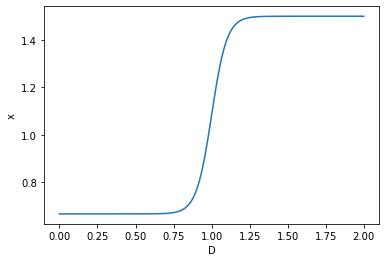

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 2.0 / 3.0
x1 = 1.5

w = 0.05

D = np.linspace(0,2, 500)

sigmaD = 1.0 / (1.0 + np.exp(-(1 - D) / w))

x =  x0 + (x1 - x0)*(1 - sigmaD)

plt.plot(D, x)
plt.xlabel('D'); plt.ylabel('x');

This is a nice trick to get an analytical function with continuous derivatives for a transition between two constants. You could have the transition occur at a value other than D = 1, as well by changing the argument to the exponential function.



## On the quad or trapz'd in ChemE heaven



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/12/on-the-quad-or-trapzd-in-cheme-heaven/)

What is the difference between quad and trapz? The short answer is that quad integrates functions (via a function handle) using numerical quadrature, and trapz performs integration of arrays of data using the trapezoid method.

Let us look at some examples. We consider the example of computing $\int_0^2 x^3 dx$. the analytical integral is $1/4 x^4$, so we know the integral evaluates to 16/4 = 4. This will be our benchmark for comparison to the numerical methods.

We use the scipy.integrate.quad command  to evaluate this $\int_0^2 x^3 dx$.



In [18]:
from scipy.integrate import quad

ans, err = quad(lambda x: x**3, 0, 2)
print(ans)

4.0


you can also define a function for the integrand.



In [19]:
from scipy.integrate import quad

def integrand(x):
    return x**3

ans, err = quad(integrand, 0, 2)
print(ans)

4.0


### Numerical data integration



if we had numerical data like this, we use trapz to integrate it



In [20]:
import numpy as np

x = np.array([0, 0.5, 1, 1.5, 2])
y = x**3

i2 = np.trapz(y, x)

error = (i2 - 4) / 4

print(i2, error)

4.25 0.0625


Note the integral of these vectors is greater than 4! You can see why here.



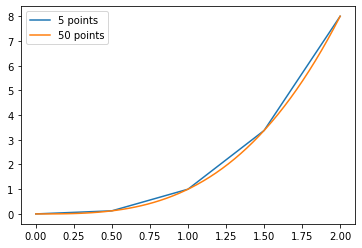

In [21]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0, 0.5, 1, 1.5, 2])
y = x**3

x2 = np.linspace(0, 2)
y2 = x2**3

plt.plot(x, y, label='5 points')
plt.plot(x2, y2, label='50 points')
plt.legend();

The trapezoid method is overestimating the area significantly. With more points, we get much closer to the analytical value.



In [22]:
import numpy as np

x2 = np.linspace(0, 2, 100)
y2 = x2**3

print(np.trapz(y2, x2))

4.000408121620243


### Combining numerical data with quad



You might want to combine numerical data with the quad function if you want to perform integrals easily. Let us say you are given this data:

x = [0 0.5 1 1.5 2];
y = [0    0.1250    1.0000    3.3750    8.0000];

and you want to integrate this from x = 0.25 to 1.75. We do not have data in those regions, so some interpolation is going to be needed. Here is one approach.



In [23]:
from scipy.interpolate import interp1d
from scipy.integrate import quad
import numpy as np

x = [0, 0.5, 1, 1.5, 2]
y = [0,    0.1250,    1.0000,    3.3750,    8.0000]

f = interp1d(x, y)

# numerical trapezoid method
xfine = np.linspace(0.25, 1.75)
yfine = f(xfine)
print(np.trapz(yfine, xfine))

# quadrature with interpolation
ans, err = quad(f, 0.25, 1.75)
print(ans)

2.531991878384006
2.5312499999999987


These approaches are very similar, and both rely on linear interpolation. The second approach is simpler, and uses fewer lines of code.



### Summary



trapz and quad are functions for getting integrals. Both can be used with numerical data if interpolation is used. The syntax for the quad and trapz function is different in scipy than in Matlab.

Finally, see this [post](http://matlab.cheme.cmu.edu/2011/08/30/solving-integral-equations/) for an example of solving an integral equation using quad and fsolve.



## Polynomials in python



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/01/polynomials-in-matlab/)

Polynomials can be represented as a list of coefficients. For example, the polynomial $4*x^3 + 3*x^2 -2*x + 10 = 0$ can be represented as [4, 3, -2, 10]. Here are some ways to create a polynomial object, and evaluate it.



In [24]:
import numpy as np

ppar = [4, 3, -2, 10]
p = np.poly1d(ppar)

print(p(3))
print(np.polyval(ppar, 3))

x = 3
print(4*x**3 + 3*x**2 -2*x + 10)

139
139
139


numpy makes it easy to get the derivative and integral of a polynomial.

Consider: $y = 2x^2 - 1$. We know the derivative is $4x$. Here we compute the derivative and evaluate it at x=4.



In [25]:
import numpy as np

p = np.poly1d([2, 0, -1])
p2 = np.polyder(p)
print(p2)
print(p2(4))

 
4 x
16


The integral of the previous polynomial is $\frac{2}{3} x^3 - x + c$. We assume $C=0$. Let us compute the integral $\int_2^4 2x^2 - 1 dx$.



In [26]:
import numpy as np

p = np.poly1d([2, 0, -1])
p2 = np.polyint(p)
print(p2)
print(p2(4) - p2(2))

        3
0.6667 x - 1 x
35.33333333333333


One reason to use polynomials is the ease of finding all of the roots using numpy.roots.



In [27]:
import numpy as np
print(np.roots([2, 0, -1])) # roots are +- sqrt(2)

# note that imaginary roots exist, e.g. x^2 + 1 = 0 has two roots, +-i
p = np.poly1d([1, 0, 1])
print(np.roots(p))

[-0.70710678  0.70710678]
[-0.+1.j  0.-1.j]


There are applications of polynomials in thermodynamics. The van der waal equation is a cubic polynomial $f(V) = V^3 - \frac{p n b + n R T}{p} V^2 + \frac{n^2 a}{p}V - \frac{n^3 a b}{p} = 0$, where $a$ and $b$ are constants, $p$ is the pressure, $R$ is the gas constant, $T$ is an absolute temperature and $n$ is the number of moles. The roots of this equation tell you the volume of the gas at those conditions.



In [28]:
import numpy as np
# numerical values of the constants
a = 3.49e4
b = 1.45
p = 679.7   # pressure in psi
T = 683     # T in Rankine
n = 1.136   # lb-moles
R = 10.73   # ft^3 * psi /R / lb-mol

ppar = [1.0, -(p*n*b+n*R*T)/p, n**2*a/p,  -n**3*a*b/p];
print(np.roots(ppar))

[5.09432376+0.j         4.4006681 +1.43502848j 4.4006681 -1.43502848j]


Note that only one root is real (and even then, we have to interpret 0.j as not being imaginary. Also, in a cubic polynomial, there can only be two imaginary roots). In this case that means there is only one phase present.



### Summary



Polynomials in numpy are even better than in Matlab, because you get a polynomial object that acts just like a function. Otherwise, they are functionally equivalent.



## Wilkinson's polynomial



[Wilkinson's polynomial](http://en.wikipedia.org/wiki/Wilkinson%27s_polynomial) is defined as

$  w(x) = \prod_{i=1}^{20} (x - i) = (x-1)(x-2) \ldots (x-20) $.

This innocent looking function has 20 roots, which are 1,2,3,&#x2026;,19,20. Here is a plot of the function.



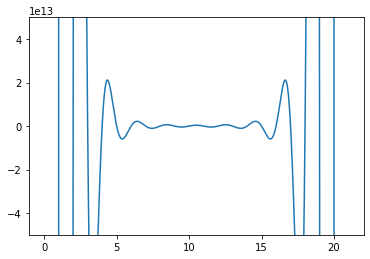

In [29]:
import matplotlib.pyplot as plt
import numpy as np

@np.vectorize
def wilkinson(x):
    p = np.prod(np.array([x - i for i in range(1, 21)]))
    return p

x = np.linspace(0, 21, 1000)
plt.plot(x, wilkinson(x))
plt.ylim([-5e13, 5e13]);

Let us consider the expanded version of the polynomial. We will use sympy to expand the polynomial.



In [30]:
from sympy import Symbol, Poly
from sympy.polys.polytools import   poly_from_expr

x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x-i)

print(W.expand())

P,d = poly_from_expr(W.expand())
print(P)

x**20 - 210*x**19 + 20615*x**18 - 1256850*x**17 + 53327946*x**16 - 1672280820*x**15 + 40171771630*x**14 - 756111184500*x**13 + 11310276995381*x**12 - 135585182899530*x**11 + 1307535010540395*x**10 - 10142299865511450*x**9 + 63030812099294896*x**8 - 311333643161390640*x**7 + 1206647803780373360*x**6 - 3599979517947607200*x**5 + 8037811822645051776*x**4 - 12870931245150988800*x**3 + 13803759753640704000*x**2 - 8752948036761600000*x + 2432902008176640000
Poly(x**20 - 210*x**19 + 20615*x**18 - 1256850*x**17 + 53327946*x**16 - 1672280820*x**15 + 40171771630*x**14 - 756111184500*x**13 + 11310276995381*x**12 - 135585182899530*x**11 + 1307535010540395*x**10 - 10142299865511450*x**9 + 63030812099294896*x**8 - 311333643161390640*x**7 + 1206647803780373360*x**6 - 3599979517947607200*x**5 + 8037811822645051776*x**4 - 12870931245150988800*x**3 + 13803759753640704000*x**2 - 8752948036761600000*x + 2432902008176640000, x, domain='ZZ')


The coefficients are orders of magnitude apart in size. This should make you nervous, because the roots of this equation are between 1-20, but there are numbers here that are O(19). This is likely to make any rounding errors in the number representations very significant, and may lead to issues with accuracy of the solution. Let us explore that.

We will get the roots using numpy.roots.



In [31]:
import numpy as np
from sympy import Symbol
from sympy.polys.polytools import   poly_from_expr

x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x-i)

P,d = poly_from_expr(W.expand())
p = P.all_coeffs()
x = np.arange(1, 21)
print('\nThese are the known roots\n',x)

# evaluate the polynomial at the known roots
print('\nThe polynomial evaluates to {0} at the known roots'.format(np.polyval(p, x)))

# find the roots ourselves
roots = np.roots(p)
print('\nHere are the roots from numpy:\n', roots)

# evaluate solution at roots
print('\nHere is the polynomial evaluated at the calculated roots:\n', np.polyval(p, roots))


These are the known roots
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

The polynomial evaluates to [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] at the known roots

Here are the roots from numpy:
 [19.99980929 19.00190982 17.99092135 17.02542715 15.94628672 15.0754938
 13.91475559 13.07431403 11.95328325 11.02502293  9.99041304  9.00291529
  7.99935583  7.000102    5.99998925  5.00000067  3.99999998  3.
  2.          1.        ]

Here is the polynomial evaluated at the calculated roots:
 [-27462952745472.0 -10278376162816.0 -7199554861056.00 -3777623778304.00
 -1555027751936.00 -613987753472.000 -365383250944.000 -215723629056.000
 -72167715840.0000 -35759895552.0000 -12707126784.0000 -4465326592.00000
 -1682691072.00000 -480398336.000000 -120152064.000000 -24114688.0000000
 -3106816.00000000 209408.000000000 181760.000000000 36352.0000000000]


The roots are not exact. Even more to the point, the polynomial does not evaluate to zero at the calculated roots! Something is clearly wrong here. The polynomial function is fine, and it does evaluate to zero at the known roots which are integers. It is subtle, but up to that point, we are using only integers, which can be represented exactly. The roots function is evidently using some float math, and the floats are not the same as the integers.

If we simply change the roots to floats, and reevaluate our polynomial, we get dramatically different results.



In [32]:
import numpy as np
from sympy import Symbol
from sympy.polys.polytools import   poly_from_expr

x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x - i)

P, d = poly_from_expr(W.expand())
p = P.all_coeffs()
x = np.arange(1, 21, dtype=np.float)
print('\nThese are the known roots\n',x)

# evaluate the polynomial at the known roots
print('\nThe polynomial evaluates to {0} at the known roots'.format(np.polyval(p, x)))

AttributeError: module 'numpy' has no attribute 'float'

This also happens if we make the polynomial coefficients floats. That happens because in Python whenever one element is a float the results of math operations with that element are floats.



In [ ]:
import numpy as np
from sympy import Symbol
from sympy.polys.polytools import   poly_from_expr

x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x - i)

P,d = poly_from_expr(W.expand())
p = [float(x) for x in P.all_coeffs()]
x = np.arange(1, 21)
print('\nThese are the known roots\n',x)

# evaluate the polynomial at the known roots
print('\nThe polynomial evaluates to {0} at the known roots'.format(np.polyval(p, x)))

Let us try to understand what is happening here. It turns out that the integer and float representations of the numbers are different! It is known that you cannot exactly represent numbers as floats.



In [ ]:
import numpy as np
from sympy import Symbol
from sympy.polys.polytools import   poly_from_expr

x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x - i)

P, d = poly_from_expr(W.expand())
p = P.all_coeffs()
print(p)
print('{0:<30s}{1:<30s}{2}'.format('Integer','Float','\delta'))
for pj in p:
    print('{0:<30d}{1:<30f}{2:3e}'.format(int(pj), float(pj), int(pj) - float(pj)))

Now you can see the issue. Many of these numbers are identical in integer and float form, but some of them are not. The integer *cannot* be exactly represented as a float, and there is a difference in the representations. It is a small difference compared to the magnitude, but these kinds of differences get raised to high powers, and become larger. You may wonder why I used "0:<30s>" to print the integer? That is because `pj` in that loop is an object from sympy, which prints as a string.

This is a famous, and well known problem that is especially bad for this case. This illustrates that you cannot simply rely on what a computer tells you the answer is, without doing some critical thinking about the problem and the solution. Especially in problems where there are coefficients that vary by many orders of magnitude you should be cautious.

There are a few interesting webpages on this topic, which inspired me to work this out in python. These webpages go into more detail on this problem, and provide additional insight into the sensitivity of the solutions to the polynomial coefficients.

1.  [http://blogs.mathworks.com/cleve/2013/03/04/wilkinsons-polynomials/](http://blogs.mathworks.com/cleve/2013/03/04/wilkinsons-polynomials/)
2.  [http://www.numericalexpert.com/blog/wilkinson_polynomial/](http://www.numericalexpert.com/blog/wilkinson_polynomial/)
3.  [http://en.wikipedia.org/wiki/Wilkinson%27s_polynomial](http://en.wikipedia.org/wiki/Wilkinson%27s_polynomial)



## The trapezoidal method of integration



[Matlab post](http://matlab.cheme.cmu.edu/2011/10/14/the-trapezoidal-method-of-integration/)

See [http://en.wikipedia.org/wiki/Trapezoidal_rule](http://en.wikipedia.org/wiki/Trapezoidal_rule)

$$\int_a^b f(x) dx \approx \frac{1}{2}\displaystyle\sum\limits_{k=1}^N(x_{k+1}-x_k)(f(x_{k+1}) + f(x_k))$$

Let us compute the integral of sin(x) from x=0 to $\pi$. To approximate the integral, we need to divide the interval from $a$ to $b$ into $N$ intervals. The analytical answer is 2.0.

We will use this example to illustrate the difference in performance between loops and vectorized operations in python.



In [ ]:
import numpy as np
import time

a = 0.0; b = np.pi;
N = 1000; # this is the number of intervals

h = (b - a)/N; # this is the width of each interval
x = np.linspace(a, b, N)
y = np.sin(x); # the sin function is already vectorized

t0 = time.time()
f = 0.0
for k in range(len(x) - 1):
    f += 0.5 * ((x[k+1] - x[k]) * (y[k+1] + y[k]))

tf = time.time() - t0
print('time elapsed = {0} sec'.format(tf))

print(f)

In [ ]:
t0 = time.time()
Xk = x[1:-1] - x[0:-2] # vectorized version of (x[k+1] - x[k])
Yk = y[1:-1] + y[0:-2] # vectorized version of (y[k+1] + y[k])

f = 0.5 * np.sum(Xk * Yk) # vectorized version of the loop above
tf = time.time() - t0
print('time elapsed = {0} sec'.format(tf))

print(f)

In the last example, there may be loop buried in the sum command. Let us do one final method, using linear algebra, in a single line. The key to understanding this is to recognize the sum is just the result of a dot product of the x differences and y sums.



In [ ]:
t0 = time.time()
f = 0.5 * np.dot(Xk, Yk)
tf = time.time() - t0
print('time elapsed = {0} sec'.format(tf))

print(f)

The loop method is straightforward to code, and looks alot like the formula that defines the trapezoid method. the vectorized methods are not as easy to read, and take fewer lines of code to write. However, the vectorized methods are much faster than the loop, so the loss of readability could be worth it for very large problems.

The times here are considerably slower than in Matlab. I am not sure if that is a totally fair comparison. Here I am running python through emacs, which may result in slower performance. I also used a very crude way of timing the performance which lumps some system performance in too.



## Numerical Simpsons rule



A more accurate numerical integration than the trapezoid method is [Simpson's rule](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html). The syntax is similar to trapz, but the method is in scipy.integrate.



In [ ]:
import numpy as np
from scipy.integrate import simps, romb

a = 0.0; b = np.pi / 4.0;
N = 10  # this is the number of intervals

x = np.linspace(a, b, N)
y = np.cos(x)

t = np.trapz(y, x)
s = simps(y, x)
a = np.sin(b) - np.sin(a)

print('trapz = {0} ({1:%} error)'.format(t, (t - a)/a))
print('simps = {0} ({1:%} error)'.format(s, (s - a)/a))
print('analy = {0}'.format(a))

You can see the Simpson's method is more accurate than the trapezoid method.



## Integrating functions in python



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/01/integrating-functions-in-matlab/)

**Problem statement**

find the integral of a function f(x) from a to b i.e.

$$\int_a^b f(x) dx$$

In python we use numerical quadrature to achieve this with the scipy.integrate.quad command.

as a specific example, lets integrate

$$y=x^2$$

from x=0 to x=1. You should be able to work out that the answer is 1/3.



In [ ]:
from scipy.integrate import quad

def integrand(x):
    return x**2

ans, err = quad(integrand, 0, 1)
print(ans)

### double integrals



we use the scipy.integrate.dblquad command

Integrate $f(x,y)=y sin(x)+x cos(y)$ over

$\pi <= x <= 2\pi$

$0 <= y <= \pi$

i.e.

$\int_{x=\pi}^{2\pi}\int_{y=0}^{\pi}y sin(x)+x cos(y)dydx$

The syntax in dblquad is a bit more complicated than in Matlab. We have to provide callable functions for the range of the y-variable. Here they are constants, so we create lambda functions that return the constants. Also, note that the order of arguments in the integrand is different than in Matlab.



In [ ]:
from scipy.integrate import dblquad
import numpy as np

def integrand(y, x):
    'y must be the first argument, and x the second.'
    return y * np.sin(x) + x * np.cos(y)

ans, err = dblquad(integrand, np.pi, 2*np.pi,
		   lambda x: 0,
		   lambda x: np.pi)
print (ans)

we use the tplquad command  to integrate $f(x,y,z)=y sin(x)+z cos(x)$ over the region

$0 <= x <= \pi$

$0 <= y <= 1$

$-1 <= z <= 1$



In [ ]:
from scipy.integrate import tplquad
import numpy as np

def integrand(z, y, x):
    return y * np.sin(x) + z * np.cos(x)

ans, err = tplquad(integrand,
                   0, np.pi,  # x limits
                   lambda x: 0,
                   lambda x: 1, # y limits
                   lambda x,y: -1,
                   lambda x,y: 1) # z limits

print (ans)

### Summary



scipy.integrate offers the same basic functionality as Matlab does. The syntax differs significantly for these simple examples, but the use of functions for the limits enables freedom to integrate over non-constant limits.



## Integrating equations in Python



A common need in engineering calculations is to integrate an equation over some range to determine the total change. For example, say we know the volumetric flow changes with time according to $d\nu/dt = \alpha t$, where $\alpha = 1$ L/min and we want to know how much liquid flows into a tank over 10 minutes if the volumetric flowrate is $\nu_0 = 5$ L/min at $t=0$. The answer to that question is the value of this integral: $V = \int_0^{10} \nu_0 + \alpha t dt$.



In [ ]:
import scipy
from scipy.integrate import quad

nu0 = 5     # L/min
alpha = 1.0 # L/min
def integrand(t):
    return nu0 + alpha * t

t0 = 0.0
tfinal = 10.0
V, estimated_error = quad(integrand, t0, tfinal)
print('{0:1.2f} L flowed into the tank over 10 minutes'.format(V))

That is all there is too it!



## Function integration by the Romberg method



An alternative to the scipy.integrate.quad function is the [Romberg method](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html). This method is not likely to be more accurate than quad, and it does not give you an error estimate.



In [ ]:
import numpy as np

from scipy.integrate import quad, romberg

a = 0.0
b = np.pi / 4.0

print(quad(np.sin, a, b))
print(romberg(np.sin, a, b))

## Symbolic math in python



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/10/symbolic-math-in-matlab/)
Python has capability to do symbolic math through the sympy package.



### Solve the quadratic equation



In [ ]:
from sympy import solve, symbols, pprint

a, b, c, x = symbols('a,b,c,x')

f = a*x**2 + b*x + c

solution = solve(f, x)
print(solution)
pprint(solution)

The solution you should recognize in the form of $\frac{b \pm \sqrt{b^2 - 4 a c}}{2 a}$ although python does not print it this nicely!



### differentiation



you might find this helpful!



In [ ]:
from sympy import diff

print(diff(f, x))
print(diff(f, x, 2))

print(diff(f, a))

### integration



In [ ]:
from sympy import integrate

print(integrate(f, x))          # indefinite integral
print(integrate(f, (x, 0, 1)))  # definite integral from x=0..1

### Analytically solve a simple ODE



In [ ]:
from sympy import Function, Symbol, dsolve
f = Function('f')
x = Symbol('x')
fprime = f(x).diff(x) - f(x) # f' = f(x)

y = dsolve(fprime, f(x))

print(y)
print(y.subs(x,4))
print([y.subs(x, X) for X in [0, 0.5, 1]]) # multiple values

It is not clear you can solve the initial value problem to get C1.

The symbolic math in sympy is pretty good. It is not up to the capability of Maple or Mathematica, (but neither is Matlab) but it continues to be developed, and could be helpful in some situations.



## Is your ice cream float bigger than mine



Float numbers (i.e. the ones with decimals) cannot be perfectly represented in a computer. This can lead to some artifacts when you have to compare float numbers that on paper should be the same, but in silico are not. Let us look at some examples. In this example, we do some simple math that should result in an answer of 1, and then see if the answer is "equal" to one.



In [ ]:
print(3.0 * (1.0/3.0))
print(1.0 == 3.0 * (1.0/3.0))

Everything looks fine. Now, consider this example.



In [ ]:
print(49.0 * (1.0/49.0))
print(1.0 == 49.0 * (1.0/49.0))

The first line shows the result is not 1.0, and the equality fails!
You can see here why the equality statement fails. We will print the two numbers to sixteen decimal places.



In [ ]:
print('{0:1.16f}'.format(49.0 * (1.0 / 49.0) ))
print('{0:1.16f}'.format(1.0))
print(1 - 49.0 * (1.0 / 49.0))

The two numbers actually are not equal to each other because of float math. They are *very, very* close to each other, but not the same.

This leads to the idea of asking if two numbers are equal to each other within some tolerance. The question of what tolerance to use requires thought. Should it be an absolute tolerance? a relative tolerance? How large should the tolerance be? We will use the distance between 1 and the nearest floating point number (this is `eps` in Matlab). `numpy` can tell us this number with the `np.spacing` command.

Below, we implement a comparison function from [doi:10.1107/S010876730302186X](http://dx.doi.org/10.1107/S010876730302186X) that allows comparisons with tolerance.



In [ ]:
# Implemented from Acta Crystallographica A60, 1-6 (2003). doi:10.1107/S010876730302186X

import numpy as np
print(np.spacing(1))

def feq(x, y, epsilon):
    'x == y'
    return not((x < (y - epsilon)) or (y < (x - epsilon)))

print(feq(1.0, 49.0 * (1.0/49.0), np.spacing(1)))

For completeness, here are the other float comparison operators from that paper. We also show a few examples.



In [ ]:
import numpy as np

def flt(x, y, epsilon):
    'x < y'
    return x < (y - epsilon)

def fgt(x, y, epsilon):
    'x > y'
    return y < (x - epsilon)

def fle(x, y, epsilon):
    'x <= y'
    return not(y < (x - epsilon))

def fge(x, y, epsilon):
    'x >= y'
    return not(x < (y - epsilon))

print(fge(1.0, 49.0 * (1.0/49.0), np.spacing(1)))
print(fle(1.0, 49.0 * (1.0/49.0), np.spacing(1)))

print(fgt(1.0 + np.spacing(1), 49.0 * (1.0/49.0), np.spacing(1)))
print(flt(1.0 - 2 * np.spacing(1), 49.0 * (1.0/49.0), np.spacing(1)))

As you can see, float comparisons can be tricky. You have to give a lot of thought to how to make the comparisons, and the functions shown above are not the only way to do it. You need to build in testing to make sure your comparisons are doing what you want.

